In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lds import LDS

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
import utils

A 2D surface parallel to earth. Noisy observations are positions $x_{x}$, $x_{y}$. Hidden variables are true position values and velocities $v_{x}$, $v_{y}$. We assume constant velocity for this example.

$x_{x}(t+1) = x_{x}(t) + v_{x}(t) + \eta_{x_{x}}(t)$

$v_{x}(t+1)$ = $v_{x}(t) + \eta_{v_x}(t)$

$x_{y}(t+1) = x_{y}(t) + v_{y}(t) + \eta_{x_{y}}(t)$

$v_{y}(t+1)$ = $v_{y}(t) + \eta_{v_y}(t)$

In [2]:
A = np.array([[1,1,0,0],[0,1,0,0],[0,0,1,1],[0,0,0,1]])
B = np.array([[1,0,0,0],[0,0,1,0]])
pi_m = np.array([0,0.8,0,-0.3])
S = 4
O = 2
pi_s = np.eye(S)
E_h = np.eye(S)*0.2
E_o = np.eye(O)*0.2

In [3]:
lds = LDS(A,B,pi_m,pi_s,S,O,E_h,E_o)

In [4]:
states,observations = lds.generate_data(10)

In [5]:
print states

[array([0.66472797, 0.01114438, 1.87771892, 0.83997502]), array([ 0.09533492, -0.27530652,  2.07686532,  0.99433998]), array([-0.22314164, -0.03972409,  2.56474064,  2.16031252]), array([-0.61130195,  0.43815932,  5.25771077,  2.51806319]), array([0.33857876, 1.07774877, 7.66329373, 2.45799168]), array([ 1.74638635,  2.26008484, 10.11970753,  2.06668355]), array([ 4.02146906,  2.46083337, 12.10217268,  1.53458684]), array([ 6.16674077,  2.11689625, 13.82857362,  1.94606639]), array([ 8.13749377,  1.82166421, 16.01683242,  2.15730443]), array([10.35270865,  1.33349973, 18.7683797 ,  2.33834977])]


In [6]:
print observations

[array([0.76222794, 1.97022043]), array([-0.26041493,  3.12479851]), array([-0.32910947,  2.15526802]), array([-0.61250343,  5.96467176]), array([0.17631519, 7.54756103]), array([ 1.48796602, 10.42904077]), array([ 3.90046014, 12.60697647]), array([ 6.21237031, 13.19461641]), array([ 7.93131186, 15.50051275]), array([10.98966333, 18.06623638])]


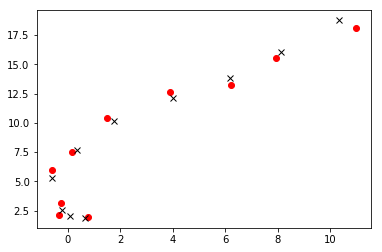

In [7]:
for obs, state in zip(observations, states):
    plt.plot(obs[0],obs[1],'ro')
    plt.plot(state[0],state[2],'kx')
plt.show()

In [8]:
f,F = lds.filtering(observations)

In [9]:
print f

[array([[0.38111396],
       [0.        ],
       [0.98511019],
       [0.        ]]), array([[-0.07712095],
       [-0.18329397],
       [ 2.51345897],
       [ 0.61133951]]), array([[-0.31537056],
       [-0.21077178],
       [ 2.34917412],
       [ 0.22352733]]), array([[-0.59684209],
       [-0.24701659],
       [ 5.3495476 ],
       [ 1.64710035]]), array([[-5.82501304e-03],
       [ 1.83325020e-01],
       [ 7.44920189e+00],
       [ 1.87949291e+00]]), array([[ 1.25443259],
       [ 0.73637365],
       [10.23295208],
       [ 2.34386575]]), array([[ 3.56022573],
       [ 1.54236907],
       [12.60160324],
       [ 2.35659462]]), array([[ 6.01465632],
       [ 2.01078054],
       [13.50881034],
       [ 1.61222625]]), array([[ 7.94808063],
       [ 1.97105212],
       [15.43290744],
       [ 1.77239614]]), array([[10.79894433],
       [ 2.42290414],
       [17.912858  ],
       [ 2.13578065]])]


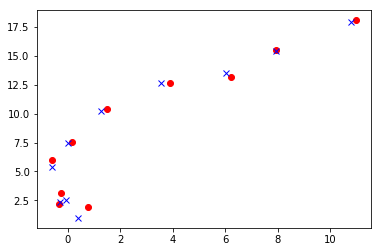

In [10]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(f[i][0],f[i][2],'bx')
plt.show()

In [11]:
h,H = lds.smoothing(observations)

In [12]:
print h

[array([[ 0.24937149],
       [-0.15792936],
       [ 1.18329728],
       [ 0.76377581]]), array([[-0.17204283],
       [-0.05237378],
       [ 2.34344727],
       [ 1.13117748]]), array([[-0.39952948],
       [ 0.22829468],
       [ 3.0896477 ],
       [ 1.8835562 ]]), array([[-0.41676768],
       [ 0.75449603],
       [ 5.52260652],
       [ 2.08653233]]), array([[0.28793121],
       [1.33049455],
       [7.71647622],
       [2.18217108]]), array([[ 1.68024462],
       [ 1.84467423],
       [10.17489986],
       [ 2.00155726]]), array([[ 3.77901629],
       [ 2.10475649],
       [12.1985688 ],
       [ 1.79883177]]), array([[ 6.01642638],
       [ 2.23218515],
       [13.61110457],
       [ 1.98240227]]), array([[ 8.18532119],
       [ 2.42290414],
       [15.62369898],
       [ 2.13578065]]), array([[10.79894433],
       [ 2.42290414],
       [17.912858  ],
       [ 2.13578065]])]


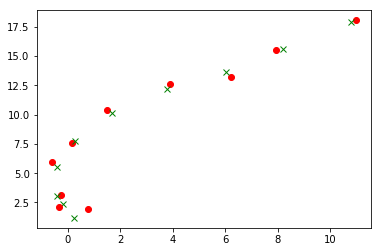

In [13]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h[i][0],h[i][2],'gx')
plt.show()

In [14]:
A, B, pi_m, pi_s, E_h, E_o, h_list, H_list = lds.EM(observations,estimate=['A','B','pi_m','pi_s'],num_iterations=100)

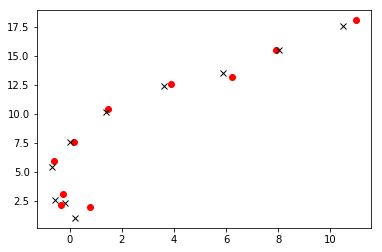

In [15]:
for i in range(len(observations)):
    plt.plot(observations[i][0],observations[i][1],'ro')
    plt.plot(h_list[i][0],h_list[i][2],'kx')
plt.show()

In [16]:
A

array([[ 0.91233042,  0.52594704,  0.10463233,  0.2112519 ],
       [-0.09357623,  0.82803286, -0.00392463,  0.40694562],
       [-0.70181836, -0.28874592,  1.66923565, -1.42463201],
       [-0.72964234,  0.27325481,  0.50504427, -0.8743016 ]])